# <font color='orange'>DIP Exercise 03</font>

In [1]:
# Force CPU usage
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'   #CUDA_VISIBLE_DEVICES环境变量为-1，这会强制TensorFlow不使用任何可用的GPU设备，从而只使用CPU进行计算。

import numpy as np   #用于处理数值计算和数组操作
import matplotlib.pyplot as plt   #用于绘制图表和可视化数据
import tensorflow as tf   #机器学习框架，用于构建神经网络
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten   #TensorFlow中用于定义神经网络层的模块。
from scipy.ndimage import convolve   #用于进行图像卷积操作。

# Set random seed for reproducibility
np.random.seed(3)  #设置随机种子，用于使代码的随机结果可重现。

The concept of artificial neural networks was already published several decades ago. But only due to improvements of computational power and the availability of large data sets within the last decade, we were able to start using the potential power of neural networks.
人工神经网络的概念在几十年前就已经发表了。但在过去的十年里，由于计算能力的提高和大数据集的可用性，我们才能够开始使用神经网络的潜在力量。

The simplest form of a neural network is the so-called perceptron. Multiple inputs are weighted ($w_i$), summed and a bias ($b$) is added to produce the final output. This general principle holds for all neural networks discussed in this course.
神经网络最简单的形式是所谓的感知器。对多个输入进行加权($w_i$)、求和，并添加一个偏差($b$)以产生最终输出。这一普遍原则适用于本课程中讨论的所有神经网络。
<img src="perceptron.png" alt="Drawing" style="width: 200px;"/>

<img src='question_sign.png' width=20px height=20px style="float:left;"> We want to build a perceptron to simulate a logical AND of two binary input values $x_{0}$ and $x_{1}$. The output neuron's activation function is a step function with
$f_{step}(y)=
\begin{cases}
1, \quad y\geq0\\
0, \quad y\lt0
\end{cases}$. Determine the values for $w_{0}$ and $w_{1}$ and $b$.<br>

<img src="table_AND.png" alt="Drawing" style="width: 200px;"/>


我们希望感知器能够模拟逻辑AND操作，即输入 x₀ 和 x₁，输出为 AND(x₀, x₁)。

感知器的输出由以下公式给出：

output =$f_{step}(y)=
\begin{cases}
1, \quad y\geq0\\
0, \quad y\lt0
\end{cases}$.

其中，z = w₀ * x₀ + w₁ * x₁ + b 是加权和。

我们要找到合适的权重 w₀、w₁ 和偏置项 b 的值，使得感知器满足逻辑AND操作的要求。

1. 对于 x₀ = 0, x₁ = 0：

   ```
   z = w₀ * 0 + w₁ * 0 + b = b
   ```

   由于输出应该为 0，根据阶跃函数的定义，我们需要 b < 0。

2. 对于 x₀ = 1, x₁ = 0 或 x₀ = 0, x₁ = 1：

   ```
   z = w₀ * 1 + w₁ * 0 + b = w₀ + b
   ```

   输出应该为 0，因此 w₀ + b < 0。

3. 对于 x₀ = 1, x₁ = 1：

   ```
   z = w₀ * 1 + w₁ * 1 + b = w₀ + w₁ + b
   ```

   输出应该为 1，因此 w₀ + w₁ + b >= 0。

结合以上三个条件，我们可以得到：

- b < 0
- w₀ + b < 0
- w₀ + w₁ + b >= 0

解这个不等系统，我们可以得到一组满足条件的解：

- w₀ = 0.5
- w₁ = 0.5
- b = -0.7

这样，感知器就能正确模拟逻辑AND操作的行为。
```

这个计算过程详细说明了如何根据逻辑AND操作的要求来选择合适的权重和偏置项的值，使感知器能够正确地模拟这个逻辑运算。

<img src='question_sign.png' width=20px height=20px style="float:left;"> Determine the values for $w_{0}$, $w_{1}$ and $b$ for solving a logical OR for the same setup.<br>

<img src="table_OR.png" alt="Drawing" style="width: 200px;"/>

output =$f_{step}(y)=
\begin{cases}
1, \quad y\geq0\\
0, \quad y\lt0
\end{cases}$.

我们希望确定权重 \(w_{0}\)、\(w_{1}\) 和偏置项 \(b\) 的值，以实现逻辑OR运算。

### 1. \(x_{0} = 0\) 且 \(x_{1} = 0\) 的情况

我们希望在 \(x_{0} = 0\) 且 \(x_{1} = 0\) 时输出为 0。这要求加权和 \(z = w_{0} \cdot x_{0} + w_{1} \cdot x_{1} + b\) 应小于0，以满足输出为0的阶跃函数条件。

### 2. \(x_{0} = 1\) 或 \(x_{1} = 1\) 的情况

我们希望在 \(x_{0} = 1\) 或 \(x_{1} = 1\) 时输出为 1。这要求加权和 \(z\) 大于等于0，以获得输出为1。

因此，我们可以设置 \(w_{0} = 1\)、\(w_{1} = 1\) 和 \(b = -0.5\)，这将确保至少一个输入为1时，加权和 \(z\) 大于0，从而满足输出为1的阶跃函数条件。

### 总结

综上所述，我们可以得出以下解来解决逻辑OR运算的感知器：

- \(w_{0} = 1\)
- \(w_{1} = 1\)
- \(b = -0.5\)

这些权重和偏置项的取值将确保感知器正确地模拟逻辑OR运算的行为。
```

非常感谢您的指正，我希望这次的回答是准确的。如果您在支持Markdown的环境中查看，应该会正确显示数学公式和文本解释。

Multiple of these perceptrons can be stacked and connected in order to obtain a more complex network structure with higher capacity, called _Multilayer Perceptron_. This allows us to solve more complex tasks, but on the other hand it comes with a tradeoff between capacity and the number of parameters, which have to be trained.

这些感知器中的多个可以堆叠和连接，以获得更复杂的网络结构和更高的容量，称为多层感知器。这使我们能够解决更复杂的任务，但另一方面，它需要在容量和必须训练的参数数量之间进行权衡。

<img src='question_sign.png' width=20px height=20px style="float:left;"> Calculate the number of trainable parameters for the following multilayer perceptron.<br>

计算以下多层感知器可训练参数的个数

1.输入层和第一隐藏层之间的可训练参数：

权重 = 3 * 4 = 12

偏差 = 4（第一个隐藏层中的 4 个节点）

可训练参数 = 权重 + 偏差

= 12 + 4

= 16

2.第一隐藏层和第二隐藏层之间的可训练参数：

权重 = 4 * 4 = 16

偏差 = 4（第二个隐藏层中的 4 个节点）

可训练参数 = 权重 + 偏差

= 16 + 4

= 20

3. 第二隐藏层和输出层之间的可训练参数：

权重 = 4 * 1 = 4

偏差 = 1

可训练参数 = 权重 + 偏差

= 4 + 1

= 5

<img src='MLP.png' width=649px height=318px style="float:left;"><br>

>

With such a multilayer perceptron we can also advance to more complex functions and set up a small network to approximate a sine function within a small interval. For demonstration we will use a training set of 100 samples and a multilayer perceptron with two hidden layers comprising 8 and 4 channels respectively and one output layer.

However, before we can start training we need to choose another activation function, since a step function is not suitable for predicting continuous outputs and is not differentiable. One popular output activation functions for single outputs is the hyperbolic tangent.

有了这样一个多层感知器，我们还可以进一步研究更复杂的函数，并建立一个小网络来在小区间内近似正弦函数。为了演示，我们将使用一个包含100个样本的训练集和一个多层感知器，该感知器具有两个隐藏层，分别包含8个和4个通道，以及一个输出层。

然而，在我们开始训练之前，我们需要选择另一个激活函数，因为阶跃函数不适合预测连续输出，并且不可微。对于单个输出，一个流行的输出激活函数是双曲正切。

<img src='question_sign.png' width=20px height=20px style="float:left;"> When not only considering a single output, but rather a multi-class classification problem, which output activation should be used instead?<br>

当不仅考虑单个输出，而且考虑多类分类问题时，应该使用哪种输出激活?

在多类分类问题中，通常会使用Softmax激活函数作为输出激活函数。Softmax函数能够将原始输出转化为表示各个类别概率的激活值，使得它们的总和为1。这对于多类别分类问题非常有用，因为它能够提供每个类别的相对概率，从而方便进行概率性的决策和预测。>

<img src='question_sign.png' width=20px height=20px style="float:left;"> In general, any function can be used as activation, as long as it is differentiable. Why do losses and activation functions within a network have to be differentiable?<br>

一般来说，任何函数都可以作为激活函数，只要它是可微的。为什么网络中的损失和激活函数必须是可微的?

在神经网络中，使用可微的激活函数和损失函数有几个重要的原因：

反向传播算法（Backpropagation）：神经网络的训练通常通过反向传播算法来优化权重和偏置，从而最小化损失函数。这个过程涉及计算梯度（导数），以确定如何调整网络参数来减小损失。如果激活函数和损失函数不可微，就无法计算梯度，从而无法使用标准的梯度下降等优化方法。

梯度下降优化：梯度下降是一种常用的优化方法，它依赖于损失函数的梯度信息来更新网络参数。可微的损失函数和激活函数能够提供梯度信息，指导网络参数的更新方向和幅度，以逐步降低损失函数值。

数值计算：可微的函数使得计算梯度更加高效和稳定。在实际计算中，使用数值近似求导可能会引入误差和不稳定性，而可微函数则可以通过解析求导得到精确的梯度。

数学分析和理论支持：神经网络的许多理论分析和性质证明都基于可微的假设。这些分析有助于了解网络的行为和性能。

因此，选择可微的损失函数和激活函数有助于保证网络的稳定性、可训练性和优化效率，以及使得神经网络的理论分析更加丰富和有效。> 

<img src='question_sign.png' width=20px height=20px style="float:left;"> When setting up a training precedure for neural networks, you will most likely come accross the terms *Loss*, *Metrics* and *Optimizer*. Describe the meaning of each of these terms.

在为神经网络建立训练程序时，你很可能会遇到*Loss*、*Metrics*和*Optimizer*这些术语。描述这些术语的含义。

Loss（损失函数）：损失函数是用来衡量模型预测与真实值之间的差距或误差的函数。在训练过程中，神经网络通过最小化损失函数来调整权重和偏置，以使模型的预测结果更接近真实值。常见的损失函数包括均方误差（MSE）、交叉熵（Cross-Entropy）等。选择适当的损失函数取决于问题的性质和模型的任务。

Metrics（指标）：指标用于评估模型性能的度量标准。它们通常用于验证和测试模型，以了解模型在不同方面的表现如何。在训练过程中，损失函数是优化的目标，而指标是用于监控和报告模型的性能。常见的分类任务指标包括准确率（Accuracy）、精确度（Precision）、召回率（Recall）等。对于回归任务，常见的指标包括均方根误差（RMSE）、平均绝对误差（MAE）等。

Optimizer（优化器）：优化器是一种用于更新神经网络参数（权重和偏置）的算法，以最小化损失函数。优化器根据损失函数的梯度信息调整参数，使损失逐步减小。常见的优化器包括随机梯度下降（SGD）、Adam、RMSProp等。选择适当的优化器取决于问题的复杂性、数据的特点和模型的结构。

综上所述，Loss（损失函数）、Metrics（指标）和Optimizer（优化器）是构建神经网络训练程序时需要关注的关键概念，它们在训练过程中共同作用，以达到训练高效、模型性能优良的目标。> 

Now we can start setting up the first small Multilayer Perceptron for simulation of a sine function. Therefore, we will define a random training set, define the network architecture, set the training parameters and initiate the training.

现在我们可以开始设置第一个小型多层感知器来模拟正弦函数。因此，我们将定义一个随机训练集，定义网络架构，设置训练参数，开始训练。

In [2]:
# Get random samples within the range [0, 2*pi] and the corresponding function output
x_sin_train = 2*np.pi*np.random.rand(500, 1)
y_sin_train = np.sin(x_sin_train)

# Set up and train the network
sin_epochs = 100
tf.keras.backend.clear_session()
model_sin = tf.keras.models.Sequential([
    Dense(units=8, activation='tanh', input_dim=1),
    Dense(units=8, activation='tanh'),
    Dense(units=1, activation='tanh')
    ])

# Define training parameters
model_sin.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the network 
sin_history = model_sin.fit(x_sin_train, y_sin_train, epochs=sin_epochs, verbose=0)

In order to determine how well the network learns to approximate the target values and if it has trouble to do so, we could investigate the training procedure.

为了确定网络如何学习近似目标值，如果它在这方面有困难，我们可以研究训练过程。

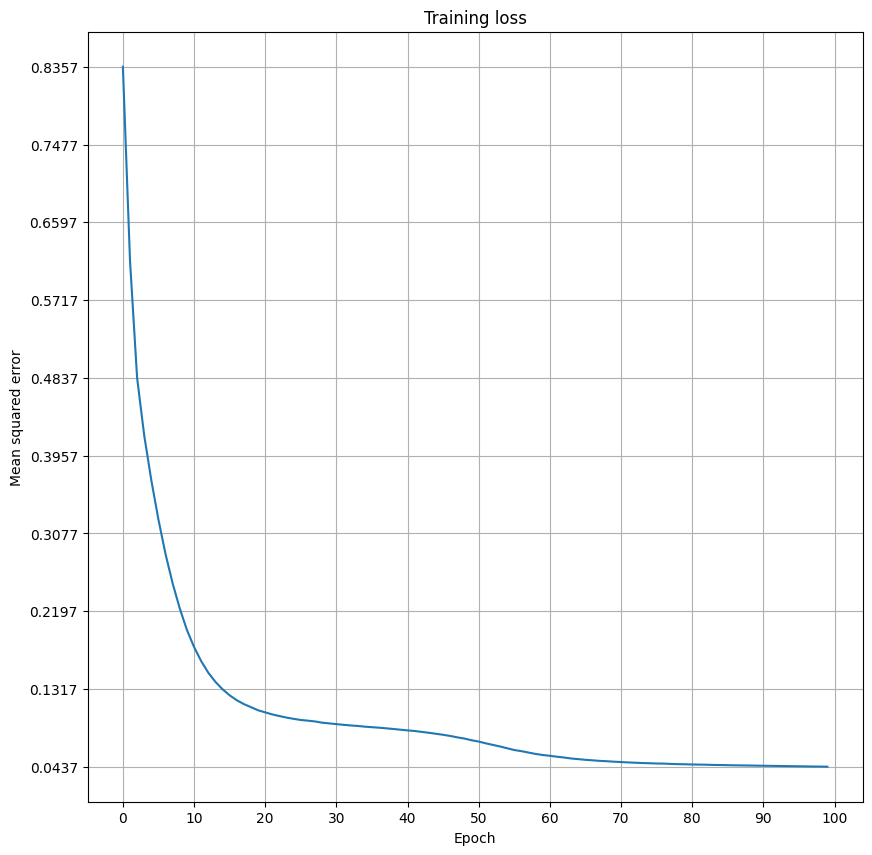

In [3]:
# Plot training loss values
sin_loss = sin_history.history['loss']
plt.figure(figsize=[10, 10])
plt.plot(np.arange(0, sin_epochs), sin_loss)
plt.grid()
axes = plt.gca()
axes.set(title='Training loss', 
         xlabel='Epoch', xticks=np.arange(0, sin_epochs+1, 10), 
         ylabel='Mean squared error', yticks=np.linspace(np.min(sin_loss), np.max(sin_loss), 10))
plt.show()

The final ouput after training can be visualized by plotting results from another test set.

训练后的最终输出可以通过绘制另一个测试集的结果来可视化。

1/1 [==============================] - 0s 48ms/step


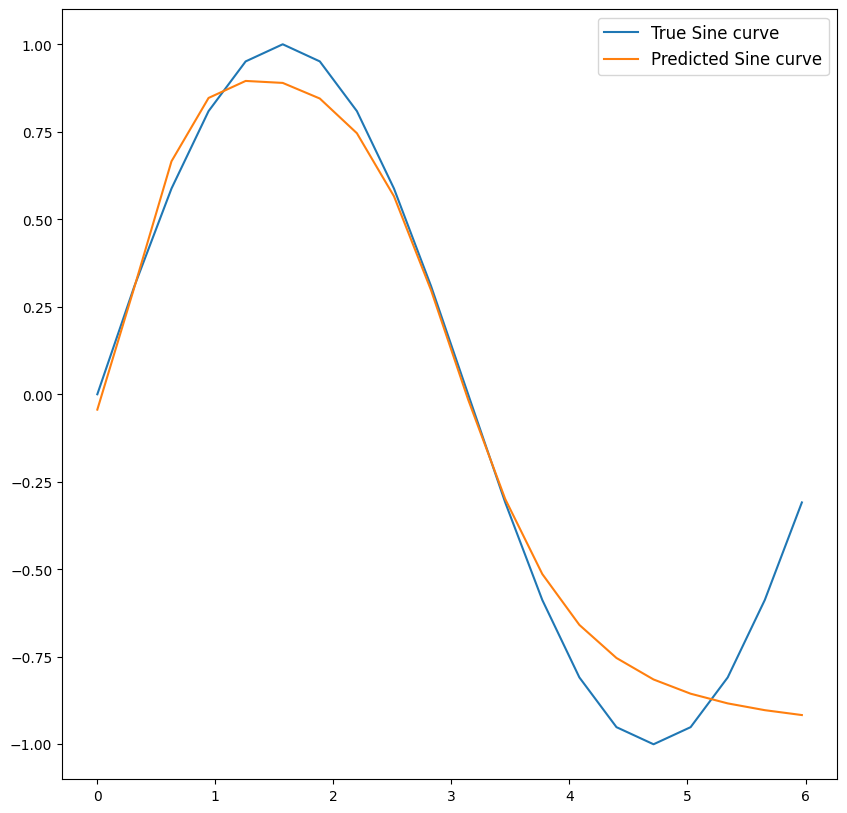

In [4]:
# Get the sample range [0, 2*pi] and the corresponding function output
x_sin_test = 2*np.pi*np.arange(0,1,0.05)
y_sin_test = np.sin(x_sin_test)

# Evaluate the trained model
y_sin_pred = model_sin.predict(x_sin_test)
plt.figure(figsize=[10,10])
plt.plot(x_sin_test, y_sin_test)
plt.plot(x_sin_test, y_sin_pred)
plt.legend(['True Sine curve', 'Predicted Sine curve'], fontsize='large')
plt.show()

When dealing with images such a fully-connected approach might not be suitable anymore. Images do have the property, that neighbouring pixels or even whole regions are mutually dependend and therefore often show redundant information. Thus, the fully-connected approach would also encode a high amount of unnessecary redundancy. To overcome this problem, fully-connected layers are often partly or even completely replaced by their convolution-based counterparts. Those convolution layers use kernels, similar to the filter approaches we used in the last exercise to process a whole image and to extract region-based features. This greatly decreases the number of parameters and furthermore makes use of spatial relationships in images.
在处理图像时，这种完全连接的方法可能不再适合。图像确实具有这样的属性，相邻的像素甚至整个区域是相互依赖的，因此经常显示冗余信息。因此，完全连接的方法也会编码大量不必要的冗余。为了克服这个问题，完全连接的层通常部分甚至完全被基于卷积的层所取代。这些卷积层使用核，类似于我们在上一个练习中使用的过滤器方法来处理整个图像并提取基于区域的特征。这大大减少了参数的数量，进一步利用了图像中的空间关系。

<img src='question_sign.png' width=20px height=20px style="float:left;"> Consider the following convolutional layer of a neural network, with $3\times 3$ kernel sizes, $3$ input channels and $5$ output channels and each layer (input and output) has a spatial size of $32\times 32$. Compute the total number of trainable parameters.<br>

<img src='conv_layer.png' width=464px height=326px style="float:left;"><br>

> 

<img src='question_sign.png' width=20px height=20px style="float:left;"> For the same input and output specifications, how many parameters would have to be trained when using a fully-connected layer instead of a convolutional layer?<br>

对于相同的输入和输出规格，如果使用全连接层（Fully Connected Layer）而不是卷积层，需要训练多少个参数？

对于全连接层，每个神经元都与上一层的所有神经元相连，因此可训练参数的总数为：

$$\text{总参数数} = (\text{输入通道数} + 1) \times \text{输出通道数}$$

给定：
- 输入通道数：3
- 输出通道数：5

代入数值计算：
$$\text{总参数数} = (3 + 1) \times 5 = 20$$

因此，使用全连接层时，需要训练的参数总数为 20。这与卷积层相比，全连接层需要更少的参数，但卷积层在处理图像等具有空间关系的数据时通常更具优势。> 

<img src='question_sign.png' width=20px height=20px style="float:left;"> We assumed, that the ouput after the convolution does also have a spatial size of $32\times 32$. But depending on the configuration, the spatial size can be reduced to $31\times 31$. Why does this happen?<br>
我们假设，卷积后的输出也有一个空间大小$32乘以 32$。但根据配置的不同，空间大小可以减少到$31\ × 31$。为什么会发生这种情况?< br >

> 

With this reduction of parameters, we can try to process whole images. We will start with considering handwritten digits from a data set called *MNIST*.
通过减少参数，我们可以尝试处理整个图像。我们将从考虑一个名为*MNIST*的数据集中的手写数字开始。

In [5]:
# Load the MNIST data set
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
#keras.datasets.mnist 模块加载 MNIST 数据集，并将数据集分为训练集和测试集。加载后，训练数据 x_train 包含手写数字的图像，y_train 包含对应的标签（即图像所表示的数字）。测试数据 x_test 包含测试图像，y_test 包含测试图像的标签。

<img src='question_sign.png' width=20px height=20px style="float:left;"> Why do we need a seperate training and test set? Why can't we use the whole data set for training and evaluate performance on the training set?<br>
为什么我们需要一个单独的训练集和测试集?为什么我们不能使用整个数据集进行训练并在训练集上评估性能呢?

我们之所以需要将数据集分为训练集和测试集，是为了能够准确地评估机器学习模型的性能和泛化能力。将数据集分为训练集和测试集有以下几个重要的原因：

1. **模型评估的客观性**：如果我们在训练集上评估模型性能，模型会记住训练集中的数据，并可能在训练集上表现良好，但并不能反映其真正的泛化能力。将测试集独立出来，可以用未在训练过程中见过的数据来评估模型的性能，更客观地了解其在未知数据上的表现。

2. **防止过拟合**：使用整个数据集进行训练可能会导致过拟合问题，即模型在训练集上表现得很好，但在新数据上表现不佳。将数据分为训练集和测试集有助于识别是否发生过拟合，以及模型是否能够适应新数据。

3. **模型选择和调整**：将测试集用于评估不同模型的性能，可以帮助选择合适的模型和调整超参数，以获得更好的泛化性能。

4. **避免数据泄露**：将测试集与训练集分开可以避免训练集中的信息泄露到测试过程中，从而更准确地评估模型在未知数据上的表现。

因此，将数据集分为训练集和测试集是为了确保模型能够在未知数据上良好地泛化，并能够准确地评估模型的性能。> 

<img src='question_sign.png' width=20px height=20px style="float:left;"> Briefly describe the term *overfitting*. How can you detect *overfitting* during training?<br>
简要描述术语“过拟合”。如何在培训过程中检测“过拟合”?

> 

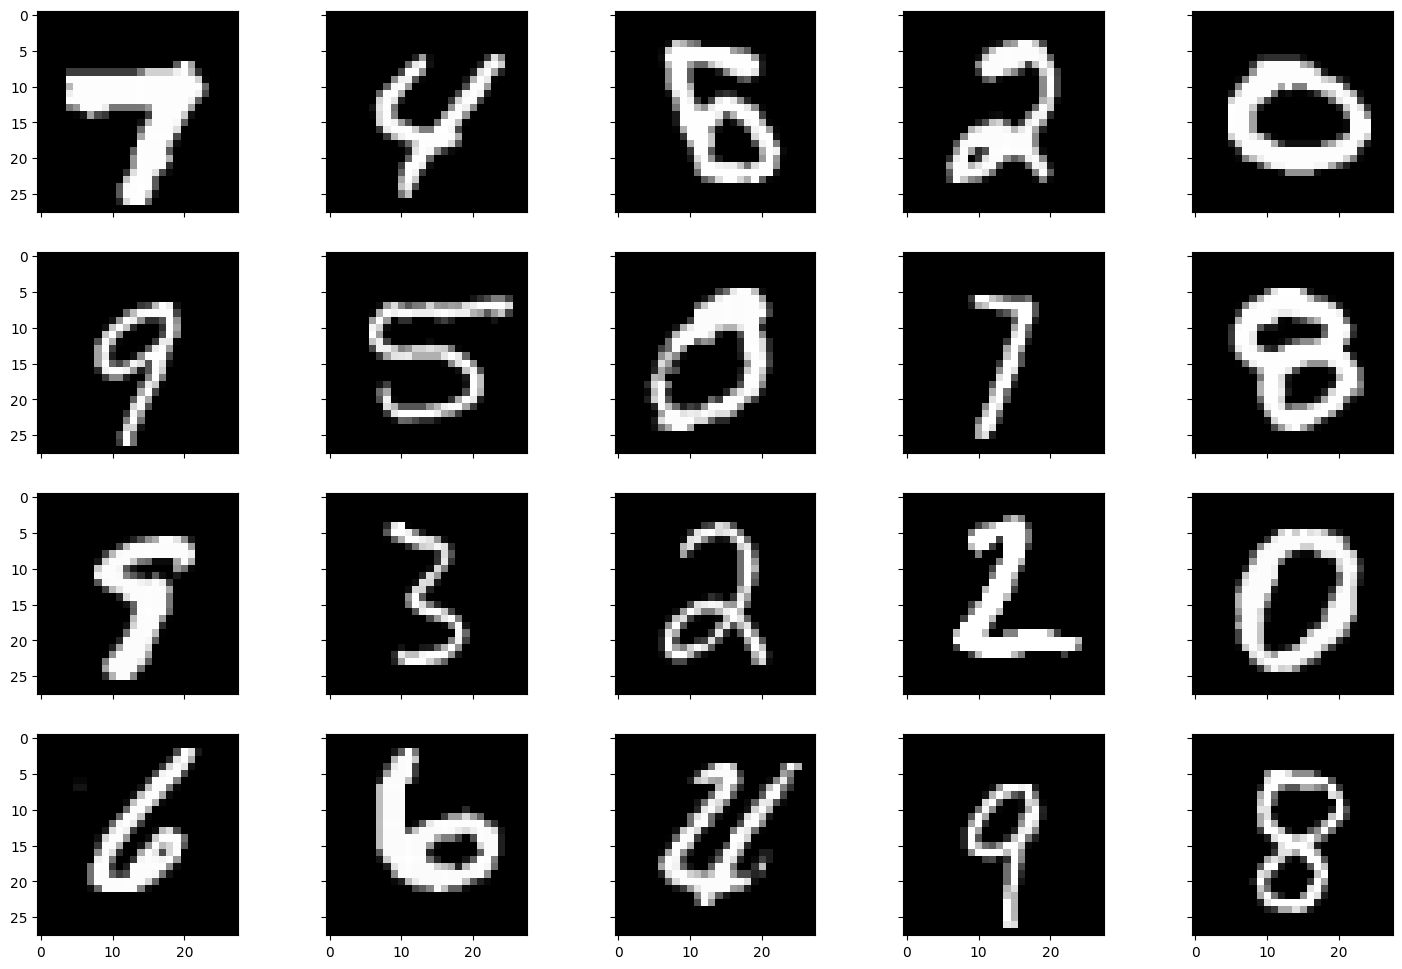

In [6]:
# Showcase of the data set
num_train_samples = len(x_train)
num_samples = 20
fig, axes = plt.subplots(4, 5, figsize=[18, 12], sharex=True, sharey=True)   #sharex 和 sharey 参数确保所有子图共享相同的 x 轴和 y 轴。
ax = axes.flat   #将多维的子图数组转换成一维数组，方便遍历
img_idx = np.random.choice(np.arange(num_train_samples), num_samples, replace=False) #replace=False：这个参数表示不允许重复选择相同的索引。这意味着所选的索引在结果中是唯一的，不会重复。
plt.gray()
for i in np.arange(num_samples):
    ax[i].imshow(x_train[img_idx[i]])
plt.show()

Common classification networks consecutively lower the spatial resolution and change the number of feature channels until at the end only one classification vector is obtained. To reduce the spatial size pooling operators are used.
常用的分类网络会不断降低空间分辨率，改变特征通道的数量，直到最后只得到一个分类向量。为了减小空间大小，使用池操作符。
正确，您提到的是卷积神经网络（Convolutional Neural Networks，CNNs）中常用的一种操作，即通过池化操作来逐步减小空间分辨率，同时改变特征通道的数量，最终将图像特征转换为一个分类向量。

池化操作是CNN中的重要组成部分，它有助于减少数据维度、降低计算量，并提取图像中的重要特征。常见的池化操作有最大池化（Max Pooling）和平均池化（Average Pooling）。

在典型的CNN架构中，卷积层和激活函数层通常会交替出现，而池化层则会在它们之间。通过多次卷积和池化操作，网络会逐渐减小空间分辨率，同时增加特征通道数量，以提取更高级别的图像特征。这有助于网络更好地捕获图像中的模式和信息，从而提高分类性能。

在经过一系列卷积和池化层后，通常会有一个或多个全连接层，将提取的特征映射转换为最终的分类向量。这种架构的设计使得卷积神经网络在图像分类、目标检测和图像分割等任务中取得了显著的成功

<img src='question_sign.png' width=20px height=20px style="float:left;"> What can alternatively be used instead of pooling to get a downsampling effect?<br>

可以使用什么替代池来获得降采样效果?

除了池化操作外，还有其他方法可以实现降采样效果。其中一种常见的方法是使用卷积操作来代替池化，以实现降低空间分辨率的目的。以下是一些替代池化的方法：

步幅卷积（Stride Convolution）：在卷积层中，通过增加卷积核的步幅，可以实现类似池化的降采样效果。较大的步幅会导致输出特征图的空间分辨率减小。

转置卷积（Transpose Convolution）：也称为反卷积（Deconvolution），用于上采样图像。转置卷积操作可以将输入特征图的空间分辨率增加，从而实现降低特征图尺寸的效果。

跳跃连接（Skip Connection）：在某些架构中，跳跃连接可以用于绕过某些层，以保留更高级别的细节。这有助于防止信息丢失并保持较高的空间分辨率。

空洞卷积（Dilated Convolution）：通过在卷积核中引入空洞（间隔）来扩展卷积操作的感受野。这可以在不降低空间分辨率的情况下增加感受野的大小。

局部响应归一化（Local Response Normalization，LRN）：LRN 是一种归一化技术，可以在一定程度上实现降低特征图尺寸的效果。

这些方法可以根据具体的架构和任务选择适当的方式来实现降采样效果，以满足不同的需求和性能要求。每种方法都有其优势和适用场景，根据具体情况进行选择。

In order to use the data for training, we first have to preprocess the data. Since the provided data set was already normalized to the range $[0,255]$, we only apply max-normalization to be in range $[0,1]$. Also, since the `tensorflow` framework requires the data to be in order $[samples,x,y,channels]$, we need to reshape each data array. The labels are given as values in range $[0,9]$ indicating the corresponding digit being presented in the image. For training we transform the label data to be represented in one-hot encoding.
为了使用这些数据进行训练，我们首先要对数据进行预处理。由于所提供的数据集已经被归一化为$[0,255]$范围，所以我们只对$[0,1]$范围应用max-normalization。此外，由于“tensorflow”框架要求数据按顺序排列$[samples,x,y,channels]$，我们需要重塑每个数据数组。标签以$[0,9]范围内的值给出，表示图像中呈现的相应数字。对于训练，我们将标签数据转换为单热编码表示。

<img src='question_sign.png' width=20px height=20px style="float:left;"> What does *one-hot* encoding mean?
“one-hot”编码是什么意思?

"one-hot" 编码是一种用于表示分类变量的编码方式，其中每个类别被表示为一个二进制向量，只有一个元素为 1（代表该类别），其余元素为 0。这种编码方式可以将分类变量转换为数值型表示，以便在机器学习模型中使用。

例如，假设有一个颜色变量，可能的类别为 "红色"、"蓝色" 和 "绿色"。使用 "one-hot" 编码，每个类别将被表示为一个二进制向量：

"红色"：[1, 0, 0]
"蓝色"：[0, 1, 0]
"绿色"：[0, 0, 1]
每个向量的长度等于类别的数量，其中只有一个元素为 1，表示所属的类别，其余元素为 0。这种表示方式有助于模型理解和处理分类变量，避免了数值之间的关系干扰。

"one-hot" 编码在分类任务中广泛应用，如图像分类、自然语言处理等领域，可以有效地将分类信息转化为模型可以处理的格式。> 

In [7]:
# Data preprocessing

# Input image dimensions
img_rows, img_cols, num_channels = 28, 28, 1   #分别代表图像的行数、列数和通道数（灰度图像的通道数为 1）。

# Normalization
x_train = x_train.astype('float')/255   #将输入图像的像素值归一化到 [0, 1] 范围内，以便在训练模型时更好地处理。
x_train = x_train.reshape([-1, img_rows, img_cols, num_channels])   #将输入图像数组重塑为适合模型输入的形状，即将其转换为四维数组，维度为 [样本数, 行数, 列数, 通道数]。

x_test = x_test.astype('float')/255
x_test = x_test.reshape([-1, img_rows, img_cols, num_channels])    #-1 表示自动计算，可以理解为将剩余维度自动计算得出，以满足原始数组的总元素数量。

# Convert class labels to one-hot encoded vectors   
num_classes = 10   #将类标签转换为 one-hot 编码：使用 tf.keras.utils.to_categorical 函数将类标签（0 到 9 的整数）转换为 one-hot 编码形式，以便在训练期间使用。num_classes 表示类别的数量，这里是 10。
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)   #将类标签（即数字标签）转换为 one-hot 编码形式，以便在训练神经网络模型时使用

This time we set up the network using the functional API of `tensorflow`, which is another, more dynamic way of defining neural network architecture, allowing to also define non-sequential architectures.
这一次，我们使用“tensorflow”的功能性API来建立网络，这是另一种更动态的定义神经网络架构的方式，也允许定义非顺序架构。

In [8]:
# Reset the current Keras graph
tf.keras.backend.clear_session()   #清除当前的 Keras 图。

# Hyperparameters  #超参数
batch_size = 50   #每个训练批次中的样本数量。
CNN_epochs = 5    #训练的轮数（迭代次数）。

# Define the convolutional network
CNN_inputs = Input(shape=(img_rows, img_cols, num_channels))   #输入层：CNN_inputs，接受图像数据作为输入

#两个卷积层（conv_1 和 conv_2）：使用不同的卷积核和激活函数，进行特征提取。
conv_1 = Conv2D(filters=6, kernel_size=(5, 5), padding='same', activation='relu')(CNN_inputs)  #使用 6 个卷积核（即输出通道数为 6），卷积核的尺寸为 5x5。padding='same' 表示在卷积操作时使用零填充，以保持输入和输出的尺寸一致。
maxpool_1 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(conv_1) #创建了一个最大池化层 maxpool_1，使用 2x2 的池化窗口。strides=(2, 2) 表示在水平和垂直方向上的步幅为 2，即每隔 2 个像素进行一次池化操作。
#两个最大池化层（maxpool_1 和 maxpool_2）：用于降低特征图的空间分辨率。交叉使用
conv_2 = Conv2D(filters=16, kernel_size=(5, 5), padding='same', activation='relu')(maxpool_1) 
maxpool_2 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(conv_2)

conv_output = Flatten()(maxpool_2)

dense_1 = Dense(units=120, activation='relu')(conv_output)
dense_2 = Dense(units=84, activation='relu')(dense_1)
CNN_predictions = Dense(units=10, activation='softmax')(dense_2)

# Instantiate the model
CNN = tf.keras.Model(inputs=CNN_inputs, outputs=CNN_predictions)   #一个实例化的卷积神经网络（CNN）模型

# Define optimizor and loss
CNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  #对实例化的卷积神经网络模型进行了编译，为模型指定了损失函数、优化器和评估指标。

# Train the network
CNN_history = CNN.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=CNN_epochs,  
                      validation_split=0.2, shuffle=True)    #validation_split=0.2：将训练数据的一部分用于验证集，这里设置为 20%。验证集用于在训练过程中监测模型性能，但不参与参数更新。

Epoch 1/5
960/960 [==============================] - 7s 7ms/step - loss: 0.2186 - accuracy: 0.9333 - val_loss: 0.0761 - val_accuracy: 0.9778
Epoch 2/5
960/960 [==============================] - 7s 7ms/step - loss: 0.0707 - accuracy: 0.9782 - val_loss: 0.0517 - val_accuracy: 0.9843
Epoch 3/5
960/960 [==============================] - 7s 7ms/step - loss: 0.0492 - accuracy: 0.9846 - val_loss: 0.0626 - val_accuracy: 0.9817
Epoch 4/5
960/960 [==============================] - 7s 7ms/step - loss: 0.0372 - accuracy: 0.9878 - val_loss: 0.0458 - val_accuracy: 0.9864
Epoch 5/5
960/960 [==============================] - 7s 7ms/step - loss: 0.0314 - accuracy: 0.9901 - val_loss: 0.0443 - val_accuracy: 0.9869


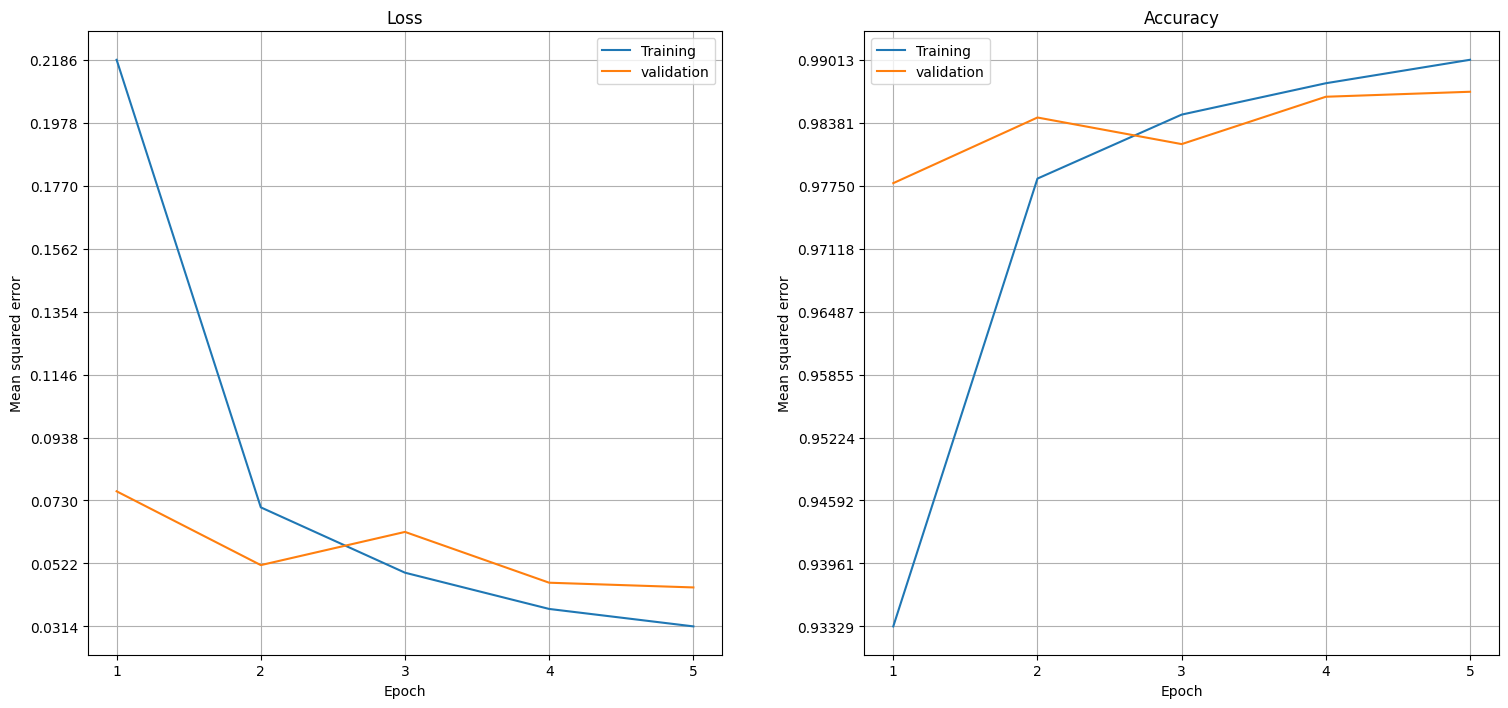

In [9]:
# Plot training & validation loss values
CNN_loss = CNN_history.history['loss']   #训练集
CNN_val_loss = CNN_history.history['val_loss']   #验证集
CNN_accuracy = CNN_history.history['accuracy']
CNN_val_accuracy = CNN_history.history['val_accuracy']
fig, axes = plt.subplots(1, 2, figsize=[16, 8])
ax = axes.flat   #因此我们使用 flat 属性将其转换为一维数组，方便后续遍历和操作每个子图
ax[0].plot(np.arange(1, CNN_epochs+1), CNN_loss)   #，其中包含从 1 到 CNN_epochs+1（不包括 CNN_epochs+1）的整数序列。
ax[0].plot(np.arange(1, CNN_epochs+1), CNN_val_loss)
ax[0].grid()
ax[0].set(title='Loss', xlabel='Epoch', xticks=np.arange(1, CNN_epochs+1), ylabel='Mean squared error',
          yticks=np.linspace(np.min(CNN_loss), np.max(CNN_loss), 10))    #设置 y 轴刻度为在训练损失值范围内均匀分布的 10 个值。这将确保 y 轴的刻度在损失值的范围内，使得图表更易于理解和比较。
ax[0].legend(['Training', 'validation'])   #在第一个子图中添加图例，标识训练集和验证集的曲线。

ax[1].plot(np.arange(1, CNN_epochs+1), CNN_accuracy)
ax[1].plot(np.arange(1, CNN_epochs+1), CNN_val_accuracy)
ax[1].grid()
ax[1].set(title='Accuracy', xlabel='Epoch', xticks=np.arange(1, CNN_epochs+1), ylabel='Mean squared error',
          yticks=np.linspace(np.min(CNN_accuracy), np.max(CNN_accuracy), 10))
ax[1].legend(['Training', 'validation'])

plt.tight_layout(pad=4)   #一个用于调整图形布局的函数
plt.show()

In [10]:
# Evaluate accuracy on test set
loss_mnist, acc_mnist = CNN.evaluate(x_test, y_test, verbose=0)   # 方法计算测试集上的损失值和准确率，verbose=0 表示不输出冗长的日志信息。
print('Accuracy on the test set: {:.2f}%'.format(acc_mnist*100))   #这部分代码使用 .format() 方法将实际的值填充到占位符中。acc_mnist*100 是测试集上的准确率乘以 100，即百分比形式的准确率。

Accuracy on the test set: 98.80%


To visually inspect the results we can plot a random subset of predictions (Predicted=P and True=T).
为了直观地检查结果，我们可以绘制预测的随机子集(expected =P and True=T)。

313/313 [==============================] - 1s 2ms/step


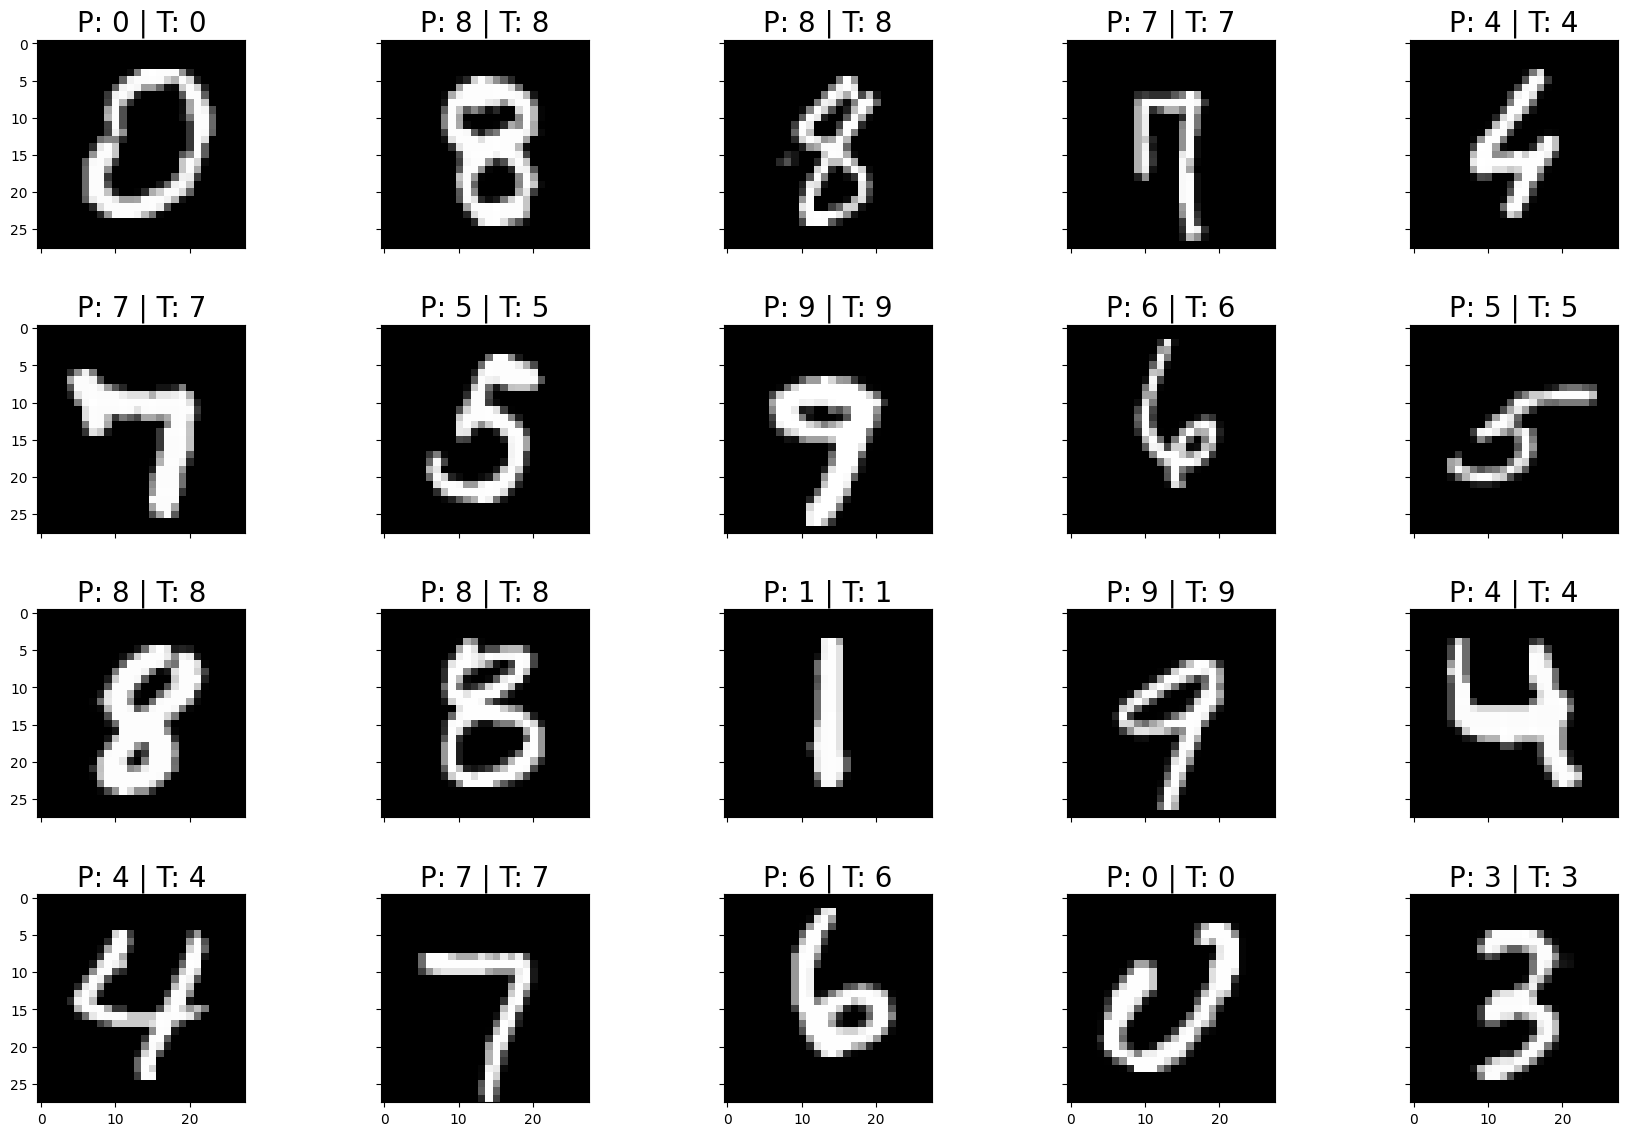

In [11]:
# Get the corresponding digit labels
pred_labels = CNN.predict(x_test)    #使用训练好的 CNN 模型对测试集进行预测，得到每个样本属于各个类别的概率分布。
pred_labels = np.argmax(pred_labels, axis=1)   #从每个样本的概率分布中选择最大概率所对应的类别标签，得到预测的数字标签。
test_labels = np.argmax(y_test, axis=1)   #从测试集的标签中选择最大值所在的索引，得到真实的数字标签。

# Plot a set of predictions
fig, axes = plt.subplots(4, 5, figsize=[18, 12], sharex=True, sharey=True)
ax = axes.flat   #将多维的子图数组转换为一维数组，方便后续遍历
plt.gray()
for num_pred, pred_idx in enumerate(np.random.randint(0, len(test_labels), 20)):
    ax[num_pred].imshow(x_test[pred_idx, :].reshape([img_rows, img_cols]))
    ax[num_pred].set_title('P: '+str(pred_labels[pred_idx])+' | T: '+str(test_labels[pred_idx]), fontsize=20)
plt.tight_layout(pad=3)
plt.show()

To further get an insight about the flaws of the trained model, we can inspect a random subset of erroneous predictions (Predicted=P and True=T).
为了进一步了解训练模型的缺陷，我们可以检查错误预测的随机子集(expected =P and True=T)。

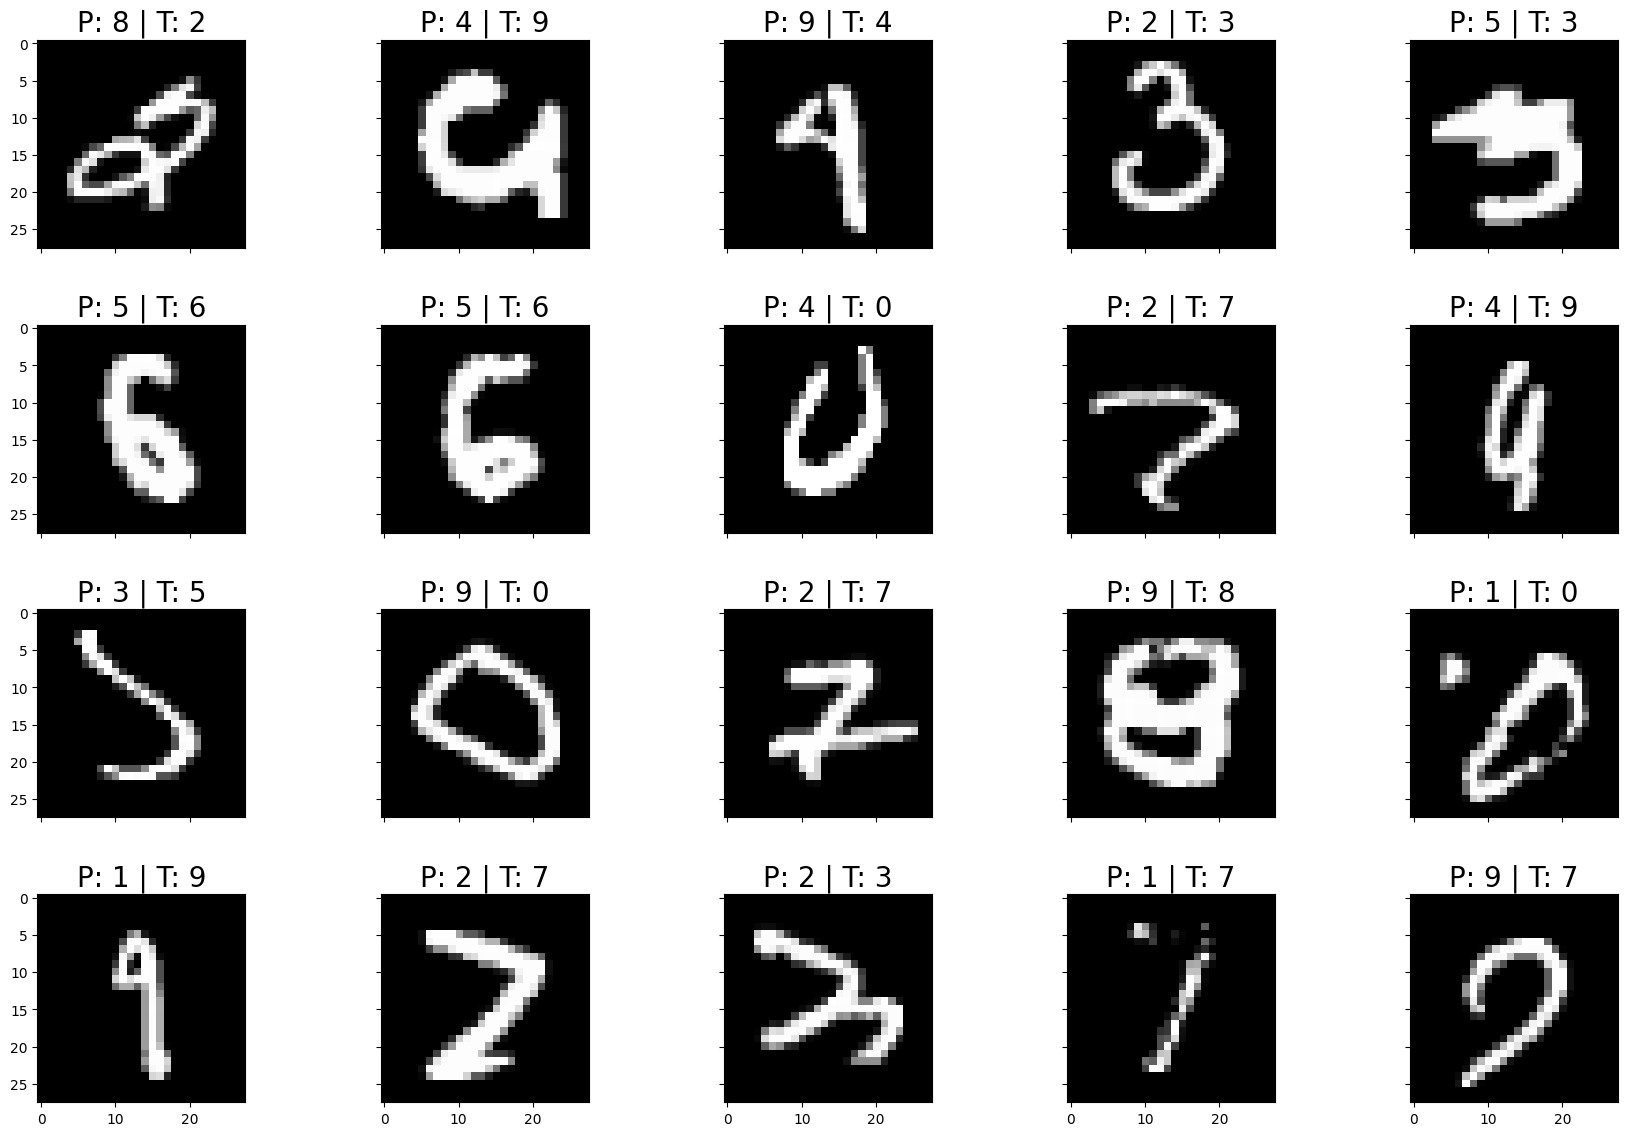

In [12]:
# The indices for erroneous predictions
err_idx = np.argwhere(pred_labels!=test_labels)[:, 0]    #找到所有错误预测的样本索引，即预测标签与真实标签不一致的样本索引。

# Plot a set of false predictions
fig, axes = plt.subplots(4, 5, figsize=[18, 12], sharex=True, sharey=True)
ax = axes.flat
plt.gray()
for num_pred, pred_idx in enumerate(np.random.choice(err_idx, 20, replace=False)):
    ax[num_pred].imshow(x_test[pred_idx,:].reshape([img_rows, img_cols]))
    ax[num_pred].set_title('P: '+str(pred_labels[pred_idx])+' | T: '+str(test_labels[pred_idx]), fontsize=20)
plt.tight_layout(pad=3)    
plt.show()

Initially we claimed, that it would be benefitial for the network to learn specific region-based image features. From the resulting feature maps again features are extracted by another convolutional layer, in order to build even more discriminative features. But does the network even learn features, we thought would be extracted, like edges and textures?

最初我们声称，学习特定的基于区域的图像特征对网络是有益的。从得到的特征映射中，特征再次被另一个卷积层提取，以构建更多的判别特征。但是，网络是否能够学习到我们认为可以提取的特征，比如边缘和纹理?

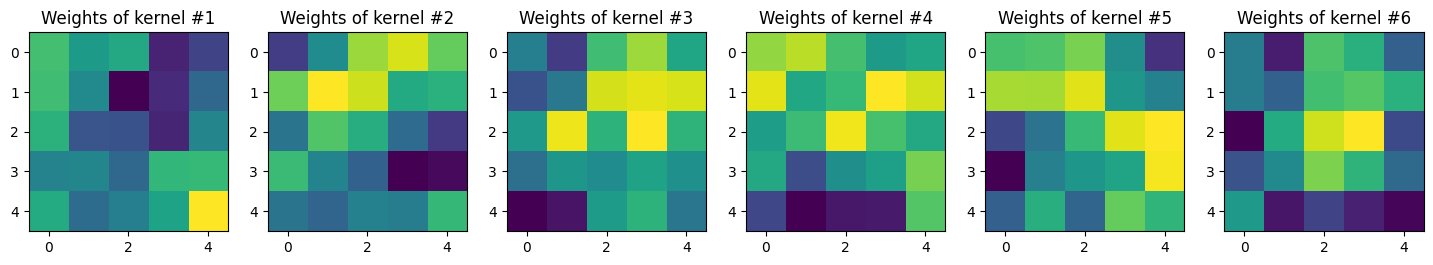

In [13]:
# Visualize kernel weights of the first convolutional layers   可视化第一个卷积层的卷积核权重
conv1_kernels = CNN.layers[1].get_weights()[0]  
num_conv1_kernels = conv1_kernels.shape[-1]
fig, axes = plt.subplots(1, num_conv1_kernels, figsize=[18, 12])
ax = axes.flat
for i in np.arange(num_conv1_kernels):
    ax[i].imshow(conv1_kernels[:, :, 0, i], cmap='viridis')
    ax[i].set_title('Weights of kernel #'+str(i+1))
plt.show()

In an abstract way, this looks like what we expected, as this is could be interpreted to be similar to edge detection and texture filters. Now we can also have a look how this affects the image, if its passed through the first convolutional layers.

在一个抽象的方式，这看起来像我们所期望的，因为这可以被解释为类似于边缘检测和纹理过滤器。现在我们也可以看看这是如何影响图像的，如果它通过了第一个卷积层。

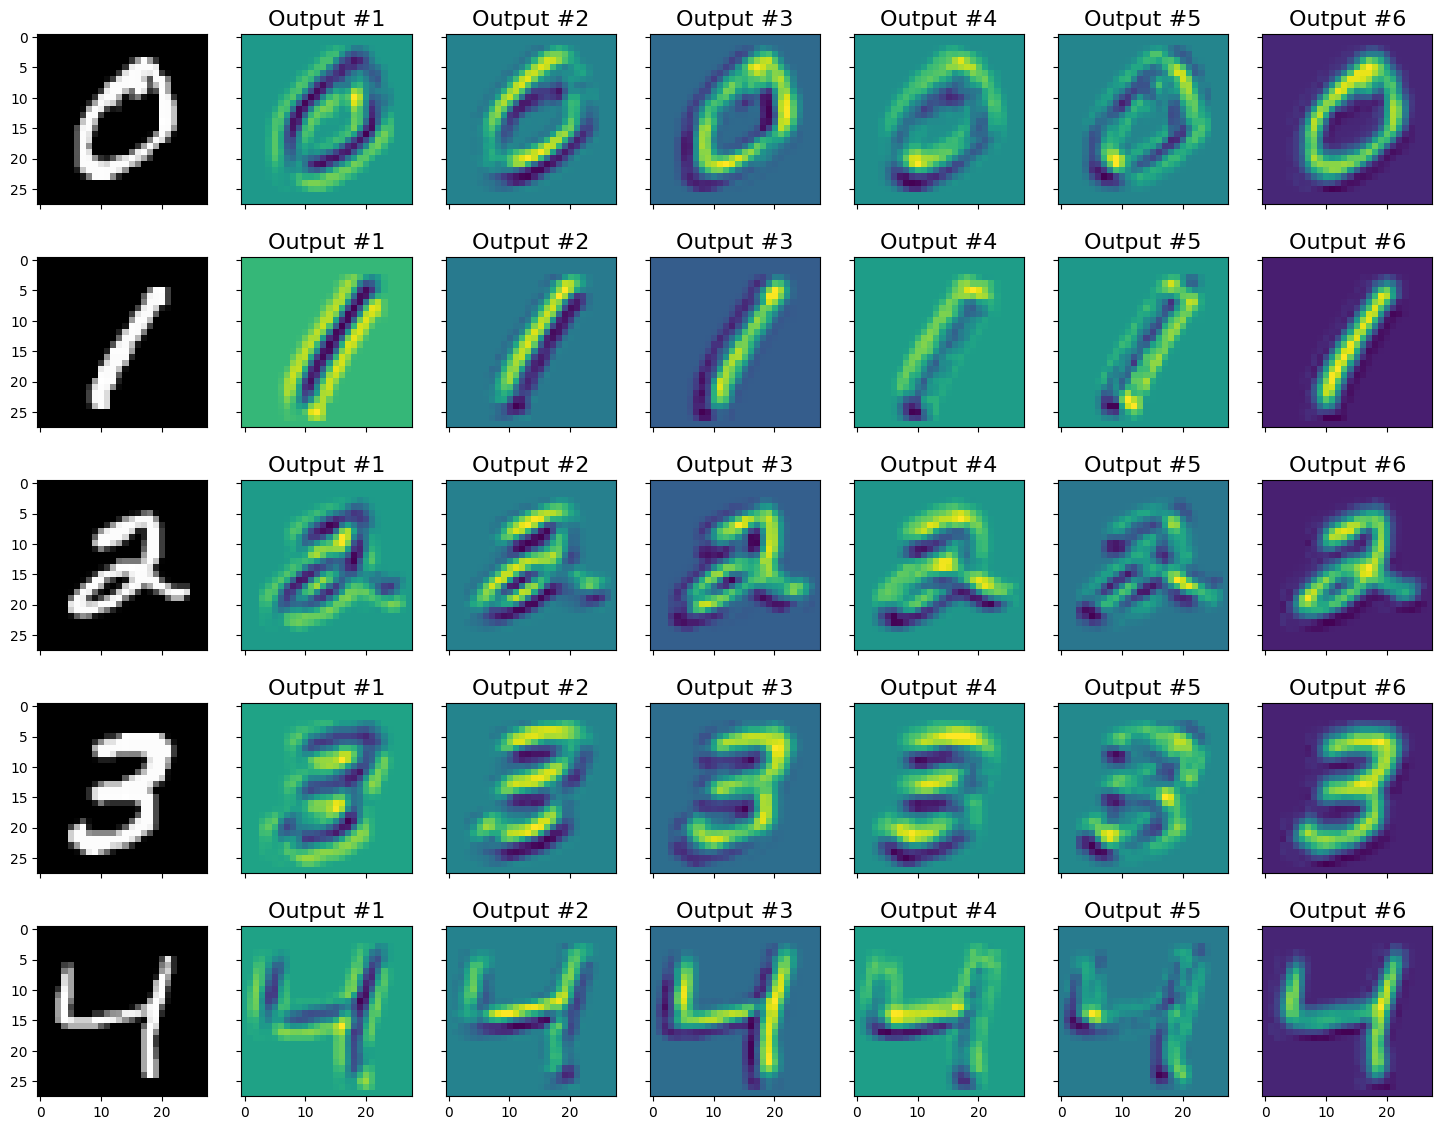

In [14]:
# Load the images and apply the convolutional kernel
fig, axes = plt.subplots(5, num_conv1_kernels+1, figsize=[18, 14], sharex=True, sharey=True)
ax = axes.flat
for i in np.arange(5):
    
    # Get the first image of the corresponding digit
    img_idx = np.squeeze(np.argwhere(np.argmax(y_train, axis=1)==i))[0]
    img = np.squeeze(x_train[img_idx])
    ax[(num_conv1_kernels+1)*i].imshow(img, cmap='gray')
    for j in np.arange(num_conv1_kernels):
        img_filtered = convolve(img, conv1_kernels[:, :, 0, j], mode='reflect')
        ax[(num_conv1_kernels+1)*i+j+1].imshow(img_filtered, cmap='viridis')
        ax[(num_conv1_kernels+1)*i+j+1].set_title('Output #'+str(j+1), fontsize=16)
plt.show()

卷积神经网络在计算机视觉领域有比较多的应用，下图便是一个图片识别的网络架构示例图（工业界使用的模型更复杂）。
<img src="1.png" alt="Drawing" style="width: 1000px;"/>


上图描述了卷积神经网络在进行正向计算/正向传播时的流程/架构，如图所示，当输入一个"小轿车"的图片时，我们希望经过一个函数f(x)各种计算后，能够输出“CAR”这个词。那么该如何计算呢？

输入层（input）：
就是读取图片，将图片用数字化的矩阵来表示。

卷积（convolution）：
选用卷积核（filter，可以是多个）对图片的多个通道进行卷积操作（element-wise的相乘）。卷积计算会使图片的长宽变小，但是"高度"变大（如图中的图片逐渐变"厚"），这是因为使用的卷积核（filter）较多，使得计算得到的图片通道数（channels）也会增加。

卷积操作其实可以理解为简化版的"连接层"，部分神经元才可以和下一层的部分神经元进行连接。

激活（activation）：

该操作主要是对之前的卷积计算结果做非线性处理，万能逼近原理告诉我们这种线性和非线性计算的组合可以拟合所有复杂的函数。常用的非线性处理函数/激活函数有Sigmoid、Relu、Leaky ReLU、tanh等，更多内容可以参考这里。

池化（pooling）：
对非线性化后的高维矩阵进行"减采样"，同样以一定步长逐步将矩阵中的"元素块（例如：9*9）"仅使用一个数来代表，比如：取"元素块"中的最大值、平均值等计算方式。
降采样可以减少后续的计算量还可以一定程度防止过拟合。